In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train= pd.read_csv('input/churn_train.csv')
test= pd.read_csv('input/churn_test.csv')
train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [10]:
# train.isnull().sum()
# test.isnull().sum()

In [15]:
train.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

<AxesSubplot:xlabel='churn', ylabel='count'>

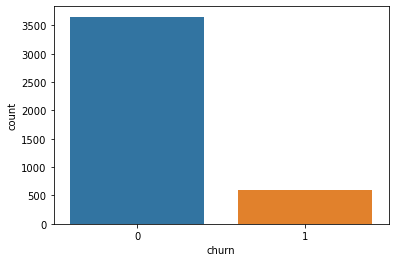

In [39]:
sns.countplot(x='churn',data= train)

<AxesSubplot:xlabel='churn', ylabel='total_day_minutes'>

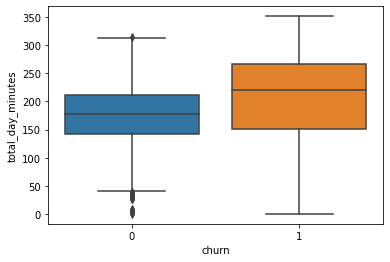

In [40]:
sns.boxplot(x='churn',y= 'total_day_minutes',data= train)

<AxesSubplot:xlabel='churn', ylabel='total_eve_minutes'>

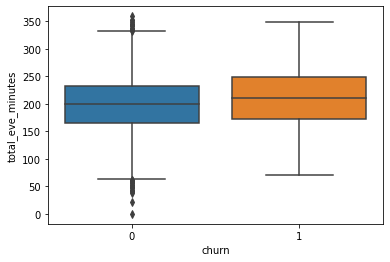

In [41]:
sns.boxplot(x='churn',y= 'total_eve_minutes',data= train)

In [46]:
churn_rate= train.groupby('state').agg(total= ('churn','size'),churned= ('churn','sum')).reset_index()
churn_rate['rate']= churn_rate['churned']/churn_rate['total']
churn_rate.sort_values(by='rate',ascending=False).head()

state  total  churned      rate
31    NJ     96       26  0.270833
4     CA     39       10  0.256410
47    WA     80       18  0.225000
20    MD     86       19  0.220930
26    MT     80       17  0.212500

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


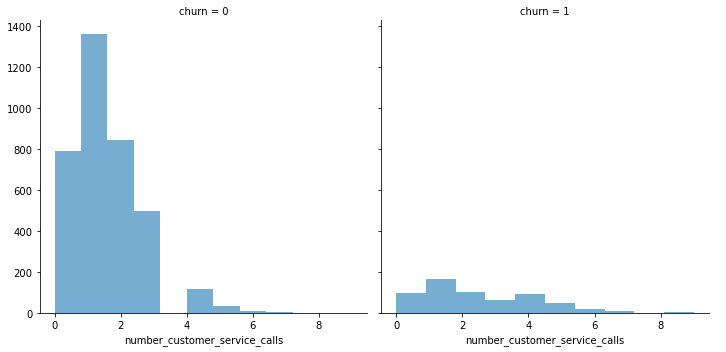

In [47]:
p= sns.FacetGrid(train,col='churn',size=5)
p.map(plt.hist,'number_customer_service_calls',alpha=0.6)
p.add_legend()
plt.show()

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


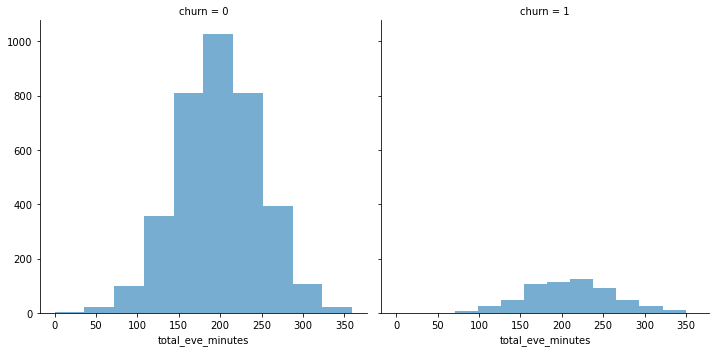

In [48]:
p= sns.FacetGrid(train,col='churn',size=5)
p.map(plt.hist,'total_eve_minutes',alpha=0.6)
p.add_legend()
plt.show()

In [49]:
train.corr()

account_length  international_plan  \
account_length                       1.000000            0.027050   
international_plan                   0.027050            1.000000   
number_vmail_messages               -0.006626            0.004808   
total_day_minutes                   -0.001612            0.040059   
total_day_calls                      0.023002            0.009776   
total_day_charge                    -0.001613            0.040061   
total_eve_minutes                   -0.010326            0.023484   
total_eve_calls                      0.005535           -0.003004   
total_eve_charge                    -0.010322            0.023479   
total_night_minutes                 -0.009916           -0.020694   
total_night_calls                   -0.001846            0.007153   
total_night_charge                  -0.009942           -0.020694   
total_intl_minutes                   0.004539            0.023815   
total_intl_calls                     0.013690            0.006956   
total_intl_charge                    0.004494            0.023799   
number_customer_service_calls        0.001002           -0.008881   
churn                                0.019378            0.259053   

                               number_vmail_messages  total_day_minutes  \
account_length                             -0.006626          -0.001612   
international_plan                          0.004808           0.040059   
number_vmail_messages                       1.000000           0.002000   
total_day_minutes                           0.002000           1.000000   
total_day_calls                            -0.006920           0.000747   
total_day_charge                            0.001994           1.000000   
total_eve_minutes                           0.010725          -0.013248   
total_eve_calls                             0.003593           0.005986   
total_eve_charge                            0.010736          -0.013258   
total_night_minutes                         0.018308           0.010049   
total_night_calls                           0.001977          -0.004812   
total_night_charge                          0.018300           0.010036   
total_intl_minutes                          0.005220          -0.021369   
total_intl_calls                            0.006585           0.003859   
total_intl_charge                           0.005249          -0.021291   
number_customer_service_calls              -0.015303          -0.002925   
churn                                      -0.100347           0.215272   

                               total_day_calls  total_day_charge  \
account_length                        0.023002         -0.001613   
international_plan                    0.009776          0.040061   
number_vmail_messages                -0.006920          0.001994   
total_day_minutes                     0.000747          1.000000   
total_day_calls                       1.000000          0.000751   
total_day_charge                      0.000751          1.000000   
total_eve_minutes                     0.008661         -0.013247   
total_eve_calls                       0.003739          0.005985   
total_eve_charge                      0.008663         -0.013257   
total_night_minutes                   0.002206          0.010053   
total_night_calls                    -0.004815         -0.004816   
total_night_charge                    0.002200          0.010040   
total_intl_minutes                    0.008834         -0.021374   
total_intl_calls                      0.009377          0.003853   
total_intl_charge                     0.008909         -0.021296   
number_customer_service_calls        -0.015845         -0.002932   
churn                                 0.011640          0.215263   

                               total_eve_minutes  total_eve_calls  \
account_length                         -0.010326         0.005535   
international_plan                      0.023484        -0.003004   
numbe

In [52]:
train['state']=train['state'].astype('category')
train_dummies= pd.get_dummies(train)
train_dummies.columns

Index(['account_length', 'international_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'state

In [53]:
shuffled= train_dummies.sample(frac=1).reset_index().drop('index',axis=1)
shuffled

account_length  international_plan  number_vmail_messages  \
0                 24                   0                      0   
1                125                   0                     25   
2                113                   0                      0   
3                 34                   0                      0   
4                 81                   1                     37   
...              ...                 ...                    ...   
4245              29                   0                     38   
4246             155                   0                      0   
4247             193                   0                      0   
4248              77                   0                      0   
4249              93                   0                      0   

      total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0                 265.6               86             45.15              208.8   
1                 190.1              133             32.32              181.1   
2                 126.0               90             21.42              205.8   
3                 124.8               82             21.22              282.2   
4                 237.1               76             40.31              264.2   
...                 ...              ...               ...                ...   
4245              149.4               93             25.40              189.8   
4246              165.4              108             28.12              183.7   
4247              170.9              124             29.05              132.3   
4248              142.3              112             24.19              306.3   
4249              179.5              121             30.52              191.9   

      total_eve_calls  total_eve_charge  total_night_minutes  ...  state_VT  \
0                 102             17.75                182.5  ...         0   
1                  61             15.39                104.0  ...         0   
2                  92             17.49                217.0  ...         0   
3                  98             23.99                311.5  ...         0   
4                 125             22.46                271.3  ...         0   
...               ...               ...                  ...  ...       ...   
4245               96             16.13                127.4  ...         0   
4246              103             15.61                 80.2  ...         0   
4247               95             11.25                112.9  ...         0   
4248              111             26.04                196.5  ...         0   
4249              131             16.31                165.5  ...         0   

      state_WA  state_WI  state_WV  state_WY  area_code_area_code_408  \
0            0         0         0         0                        1   
1            0         0         0         0                        0   
2            0         1         0         0                        0   
3            0         0         0         0                        0   
4            0         0         0         0                        1   
...        ...       ...       ...       ...                      ...   
4245         0         0         0         0                        0   
4246         0         0         0         0                        0   
4247         0         0         0         0                        0   
4248         0         0         0         0                        0   
4249         0         0         0         0                        0   

      area_code_area_code_415  area_code_area_code_510  voice_mail_plan_no  \
0                           0                        0                   1   
1                           1                        0                   0   
2                           1                        0                   1   
3                           0                        1                   1   
4           

In [57]:
train_x= shuffled.loc[0:3850,:].drop('churn',axis=1)
test_x= shuffled.loc[3851:,:].drop('churn',axis=1)
train_y= shuffled.loc[0:3850,'churn']
test_y= shuffled.loc[3851:,'churn']
test_y

3851    0
3852    0
3853    0
3854    0
3855    0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: churn, Length: 399, dtype: int64

In [58]:
train.head()

state  account_length      area_code  international_plan voice_mail_plan  \
0    OH             107  area_code_415                   0             yes   
1    NJ             137  area_code_415                   0              no   
2    OH              84  area_code_408                   1              no   
3    OK              75  area_code_415                   1              no   
4    MA             121  area_code_510                   0             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls  churn  
0                              1      0  
1                              0      0  
2                              2      0  
3                              3      0  
4                              3      0

In [59]:
import statsmodels.api as sm
model_logit= sm.Logit(train_y,sm.add_constant(train_x)).fit()
print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.295357
         Iterations 22
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3851
Model:                          Logit   Df Residuals:                     3781
Method:                           MLE   Df Model:                           69
Date:                Mon, 24 Jan 2022   Pseudo R-squ.:                  0.2671
Time:                        16:46:39   Log-Likelihood:                -1137.4
converged:                       True   LL-Null:                       -1552.0
Covariance Type:            nonrobust   LLR p-value:                9.569e-131
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -2.2267        nan        nan       

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [60]:
yhat= model_logit.predict(sm.add_constant(test_x))
yhat

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


3851    0.309225
3852    0.021815
3853    0.038211
3854    0.145937
3855    0.106627
          ...   
4245    0.010494
4246    0.102958
4247    0.052966
4248    0.124515
4249    0.022174
Length: 399, dtype: float64

In [61]:
y_all= list(map(round,yhat))
y_all

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [62]:
from sklearn.metrics import (confusion_matrix,accuracy_score)
confusion_matrix(test_y,y_all)

array([[327,   9],
       [ 49,  14]])

In [63]:
tn, fp, fn, tp = confusion_matrix(test_y,y_all).ravel()
(tn, fp, fn, tp)

(327, 9, 49, 14)

In [66]:
accuracy_score(test_y,y_all)  #(334+12)/400

0.8546365914786967

In [67]:
train_x.columns

Index(['account_length', 'international_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'st

In [69]:
model_without_states= sm.Logit(train_y,train_x.loc[:,'account_length':'number_customer_service_calls']).fit()
print(model_without_states.summary())

Optimization terminated successfully.
         Current function value: 0.332064
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 3851
Model:                          Logit   Df Residuals:                     3835
Method:                           MLE   Df Model:                           15
Date:                Mon, 24 Jan 2022   Pseudo R-squ.:                  0.1760
Time:                        16:47:13   Log-Likelihood:                -1278.8
converged:                       True   LL-Null:                       -1552.0
Covariance Type:            nonrobust   LLR p-value:                8.418e-107
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
account_length                   -0.0017      0.001     -1.331      0.

In [70]:
y_without_states= model_without_states.predict(test_x.loc[:,'account_length':'number_customer_service_calls'])
y_hat1= list(map(round,y_without_states))
accuracy_score(test_y,y_hat1)

0.8421052631578947

In [71]:
## precision and recall
precsion= tp/(tp+fp)
precsion

0.6086956521739131

In [73]:
recall= tp/(tp+fn)
recall

0.2222222222222222

In [74]:
# if we want to reduce the number of false negative we aim for  low precison and high recall
# if we want to reduce the number of false postives then we aim for a high prrecision and low recall
y_lower_th= [ 1 if x >= 0.4 else 0 for x in yhat]

In [76]:
tn1, fp1, fn1, tp1 = confusion_matrix(test_y,y_lower_th).ravel()
(tn1, fp1, fn1, tp1)
(tn,fp,fn,tp)

(327, 9, 49, 14)

In [77]:
accuracy_score(test_y,y_lower_th)

0.8596491228070176

In [78]:
recall= tp1/(tp1+fn1)
recall

0.3492063492063492

In [79]:
precison= tp1/(tp1+fp1)
precison

0.5945945945945946

In [80]:
train_dummies

account_length  international_plan  number_vmail_messages  \
0                107                   0                     26   
1                137                   0                      0   
2                 84                   1                      0   
3                 75                   1                      0   
4                121                   0                     24   
...              ...                 ...                    ...   
4245              83                   0                      0   
4246              73                   0                      0   
4247              75                   0                      0   
4248              50                   0                     40   
4249              86                   0                     34   

      total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0                 161.6              123             27.47              195.5   
1                 243.4              114             41.38              121.2   
2                 299.4               71             50.90               61.9   
3                 166.7              113             28.34              148.3   
4                 218.2               88             37.09              348.5   
...                 ...              ...               ...                ...   
4245              188.3               70             32.01              243.8   
4246              177.9               89             30.24              131.2   
4247              170.7              101             29.02              193.1   
4248              235.7              127             40.07              223.0   
4249              129.4              102             22.00              267.1   

      total_eve_calls  total_eve_charge  total_night_minutes  ...  state_VT  \
0                 103             16.62                254.4  ...         0   
1                 110             10.30                162.6  ...         0   
2                  88              5.26                196.9  ...         0   
3                 122             12.61                186.9  ...         0   
4                 108             29.62                212.6  ...         0   
...               ...               ...                  ...  ...       ...   
4245               88             20.72                213.7  ...         0   
4246               82             11.15                186.2  ...         0   
4247              126             16.41                129.1  ...         0   
4248              126             18.96                297.5  ...         0   
4249              104             22.70                154.8  ...         1   

      state_WA  state_WI  state_WV  state_WY  area_code_area_code_408  \
0            0         0         0         0                        0   
1            0         0         0         0                        0   
2            0         0         0         0                        1   
3            0         0         0         0                        0   
4            0         0         0         0                        0   
...        ...       ...       ...       ...                      ...   
4245         0         0         0         0                        0   
4246         0         0         1         0                        1   
4247         0         0         0         0                        1   
4248         0         0         0         0                        1   
4249         0         0         0         0                        0   

      area_code_area_code_415  area_code_area_code_510  voice_mail_plan_no  \
0                           1                        0                   0   
1                           1                        0                   1   
2                           0                        0                   1   
3                           1                        0                   1   
4           